In [41]:
import pandas as pd
import matplotlib
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
BAY_AREA = ['Alameda','Contra Costa','Marin','Napa','San Francisco','San Mateo','Santa Clara','Solano','Sonoma']
# poplation data from https://www2.census.gov/programs-surveys/popest/tables/2010-2019/counties/totals/co-est2019-annres-06.xlsx
POPULATION = [1671329,1153526,258826,137744,881549,766573,1927852,447643,494336]
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv", header=0)

# https://abc7news.com/governor-newsom-phases-to-reopen-guidelines-update-today-gavin-coronavirus/6157906/
# No more than one new COVID-19 case per 10,000 residents in the past 14 days
# No COVID-19 deaths in the past 14 days

In [42]:
ca_df_mar = df[(df['state']=='California')&(df['date'] > '2020-02-28')]
# ca_df_mar

In [43]:
by_county_by_date = ca_df_mar.pivot_table(index='date', columns='county',values='cases', fill_value=0)[BAY_AREA]

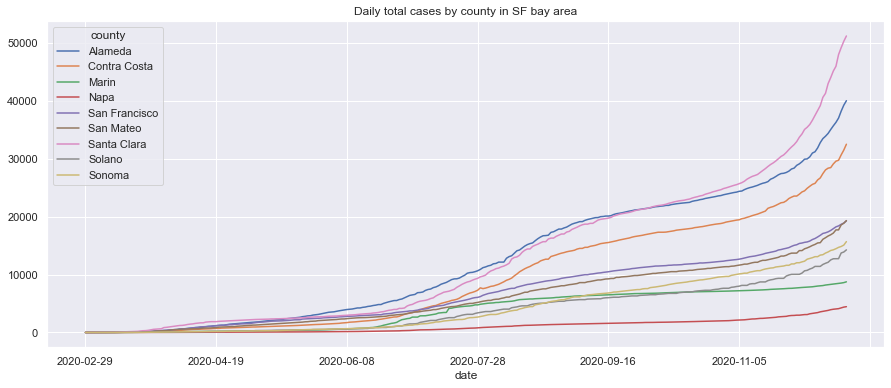

In [44]:
by_county_by_date.plot.line(figsize=(15,6), title='Daily total cases by county in SF bay area')

In [45]:
by_county_by_date_diff = by_county_by_date.diff().iloc[1:]
pop_dic = {}
for name, pop in zip(BAY_AREA, POPULATION):
    pop_dic[name] = pop / 10000
pop_dic

{'Alameda': 167.1329,
 'Contra Costa': 115.3526,
 'Marin': 25.8826,
 'Napa': 13.7744,
 'San Francisco': 88.1549,
 'San Mateo': 76.6573,
 'Santa Clara': 192.7852,
 'Solano': 44.7643,
 'Sonoma': 49.4336}

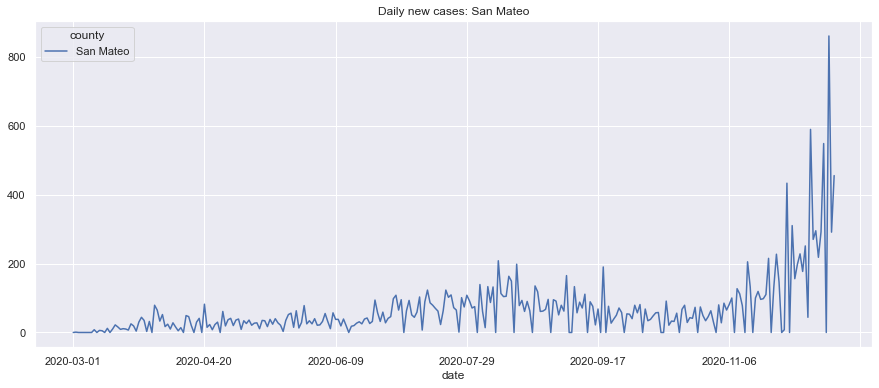

In [46]:
county = 'San Mateo'
by_county_by_date_diff[[county]].plot.line(stacked=True, figsize=(15,6), title='Daily new cases: {}'.format(county))

In [47]:
# Last 14 days new cases
by_county_by_date_diff[[county]].iloc[-14:,:].sum()

county
San Mateo    4518.0
dtype: float64

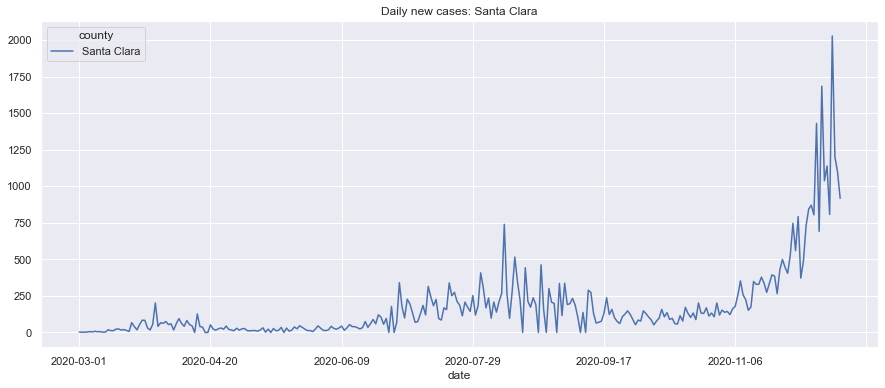

In [48]:
county = 'Santa Clara'
by_county_by_date_diff[[county]].plot.line(stacked=True, figsize=(15,6), title='Daily new cases: {}'.format(county))

In [49]:
# Last 14 days new cases
by_county_by_date_diff[[county]].iloc[-14:,:].sum()

county
Santa Clara    15288.0
dtype: float64

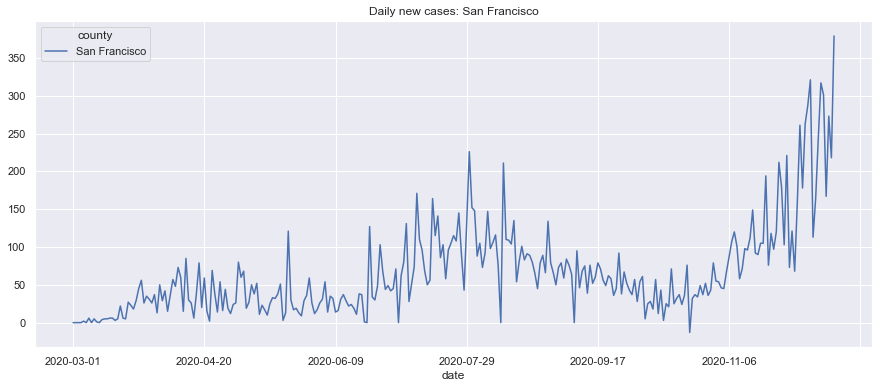

In [50]:
county = 'San Francisco'
by_county_by_date_diff[[county]].plot.line(figsize=(15,6), title='Daily new cases: {}'.format(county))

In [51]:
# Last 14 days new cases
by_county_by_date_diff[[county]].iloc[-14:,:].sum()

county
San Francisco    3486.0
dtype: float64

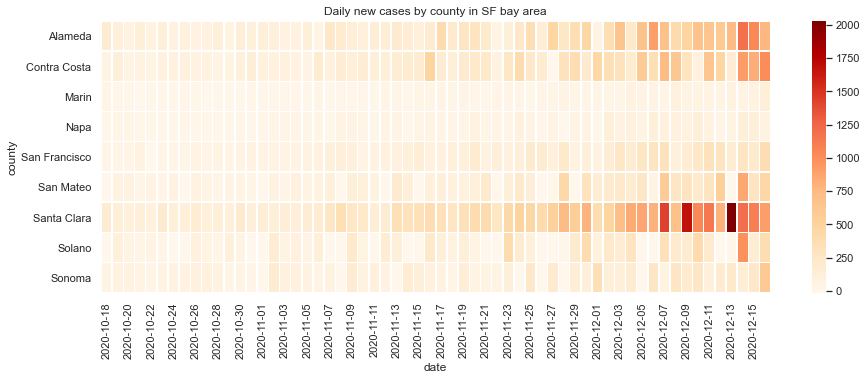

In [52]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Daily new cases by county in SF bay area')
sns.heatmap(by_county_by_date_diff[-60:].T, cmap="OrRd",linewidths=.5, ax=ax)

In [53]:
death_by_county_by_date = ca_df_mar.pivot_table(index='date', columns='county',values='deaths', fill_value=0)[BAY_AREA]
# death_by_county_by_date

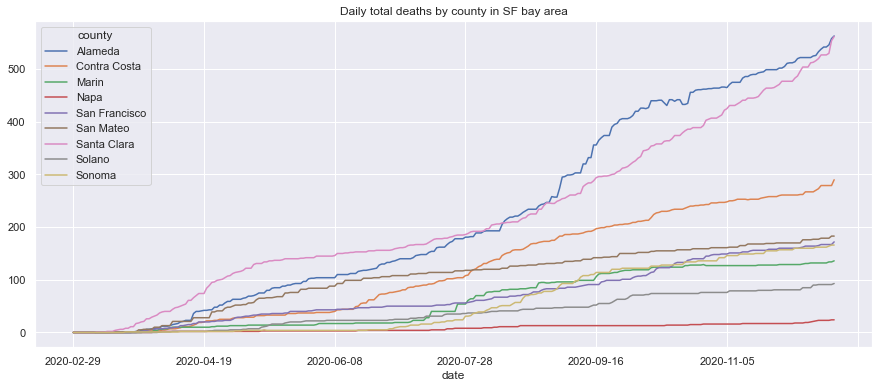

In [54]:
death_by_county_by_date.plot.line(figsize=(15,6), title='Daily total deaths by county in SF bay area')

In [55]:
death_by_county_by_date_diff = death_by_county_by_date.diff().iloc[1:]
# death_by_county_by_date_diff

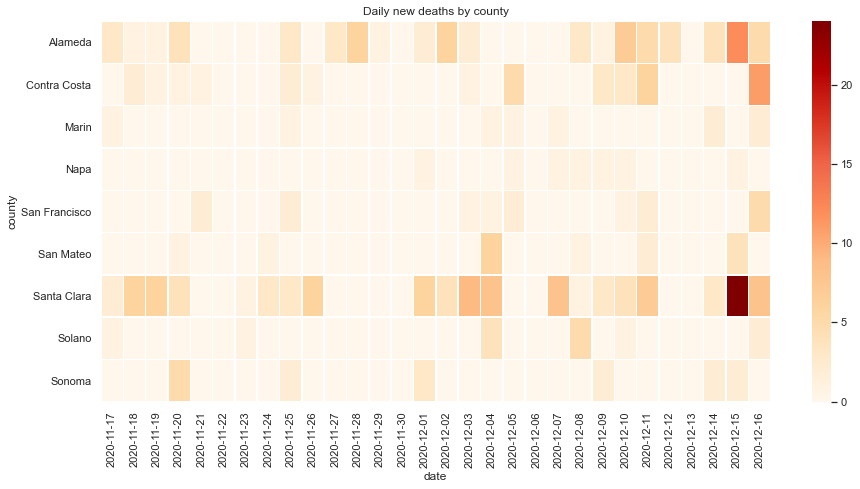

In [56]:
fig6, ax6 = plt.subplots(figsize=(15,7))
ax6.set_title('Daily new deaths by county')
sns.heatmap(death_by_county_by_date_diff[-30:].T, cmap="OrRd",linewidths=.5, ax=ax6)

In [57]:
state_df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv", header=0)
# state_df

In [58]:
state_df_mar = state_df[state_df['date'] > '2020-02-28']
# state_df_mar

In [59]:
by_state_by_date = state_df_mar.pivot_table(index='date', columns='state',values='deaths', fill_value=0)
# by_state_by_date

In [60]:
by_state_by_date_diff = by_state_by_date.diff().iloc[1:]
# by_state_by_date_diff

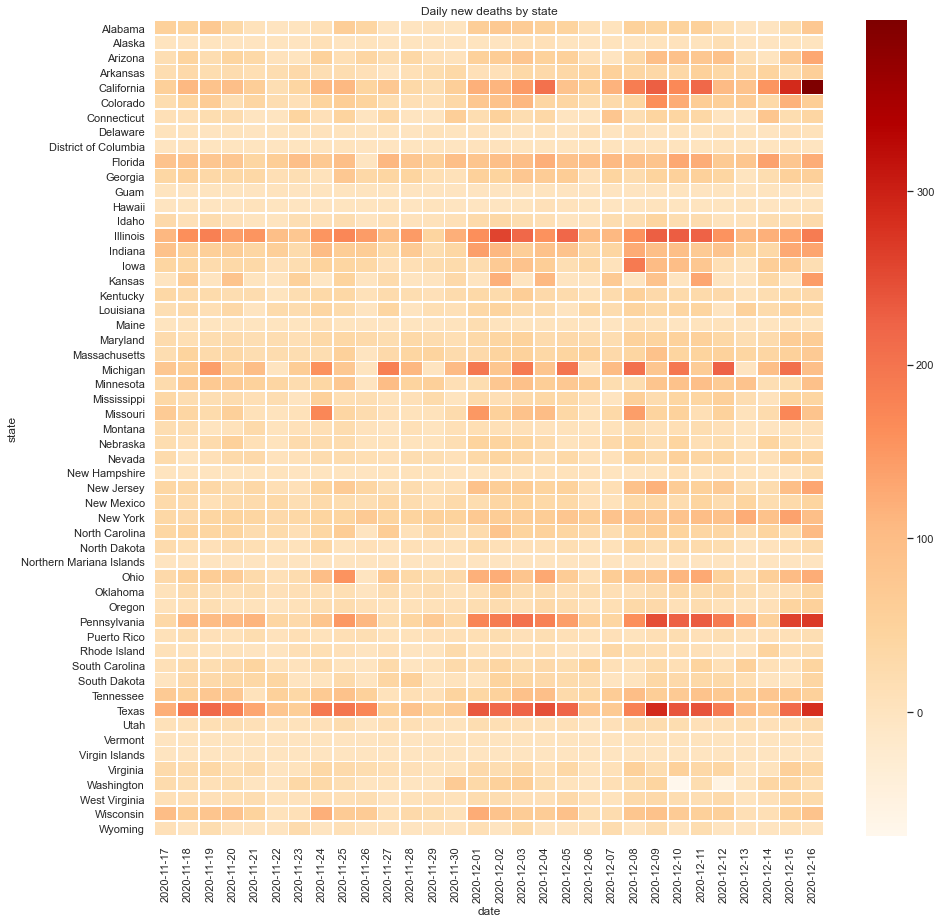

In [61]:
fig5, ax5 = plt.subplots(figsize=(15,15))
ax5.set_title('Daily new deaths by state')
sns.heatmap(by_state_by_date_diff[-30:].T, cmap="OrRd",linewidths=.5, ax=ax5)

In [62]:
by_state_by_date_cases = state_df_mar.pivot_table(index='date', columns='state',values='cases', fill_value=0)
# by_state_by_date
by_state_by_date_cases_diff = by_state_by_date_cases.diff().iloc[1:]

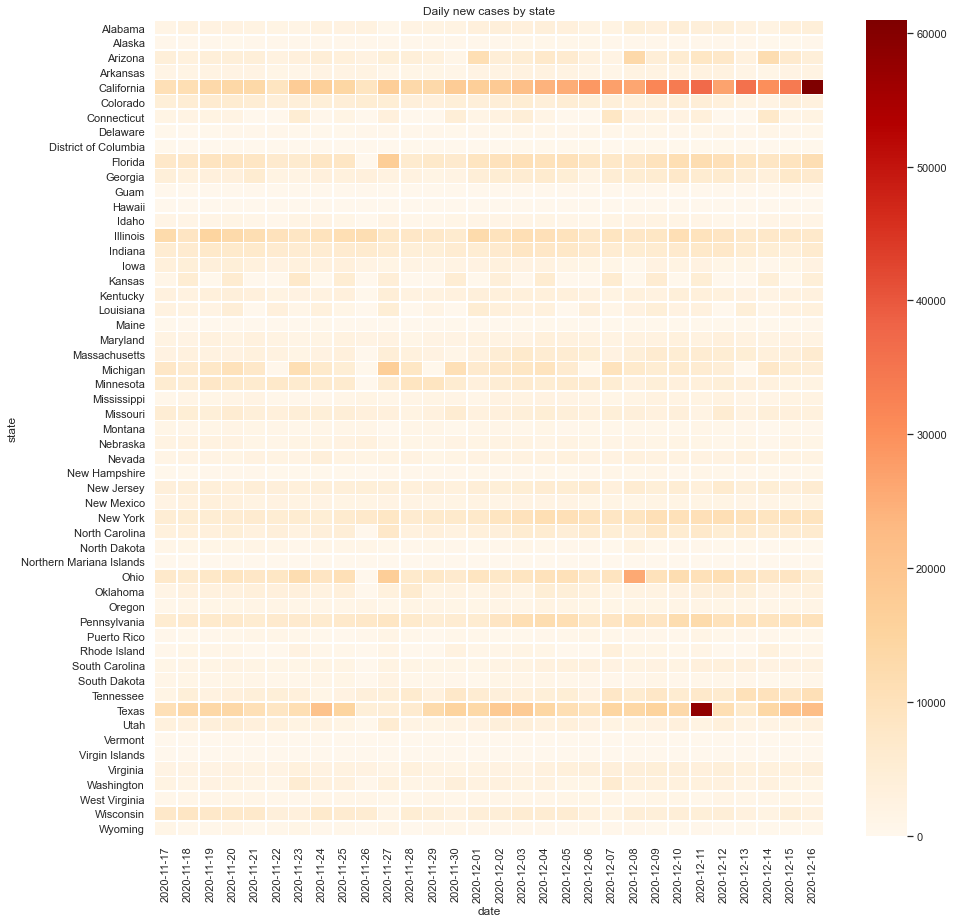

In [63]:
fig4, ax4 = plt.subplots(figsize=(15,15))
ax4.set_title('Daily new cases by state')
sns.heatmap(by_state_by_date_cases_diff[-30:].T, cmap="OrRd",linewidths=.5, ax=ax4)